In [5]:
# Imports and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
print("Shape:", df.shape)
df.head()

Shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [7]:
# Cell: Basic info, dtypes and missing values
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB

Missing values per column:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device             

In [8]:
# Cell: Unique values for key categorical columns
for col in ['Primary_Device', 'Gender', 'Urban_or_Rural', 'Health_Impacts']:
    if col in df.columns:
        print(col, '->', df[col].nunique(), 'unique values')
        print(df[col].value_counts().head(10))

Primary_Device -> 4 unique values
Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64
Gender -> 2 unique values
Gender
Male      4942
Female    4770
Name: count, dtype: int64
Urban_or_Rural -> 2 unique values
Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64
Health_Impacts -> 15 unique values
Health_Impacts
Poor Sleep                              2268
Poor Sleep, Eye Strain                   979
Eye Strain                               644
Poor Sleep, Anxiety                      608
Poor Sleep, Obesity Risk                 452
Anxiety                                  385
Poor Sleep, Eye Strain, Anxiety          258
Obesity Risk                             252
Poor Sleep, Eye Strain, Obesity Risk     188
Eye Strain, Anxiety                      135
Name: count, dtype: int64


In [9]:
# Cell: Derived columns: Age groups and Activity Category (from Educational_to_Recreational_Ratio)
# Age groups: 0-4,5-7,8-10,11-13,14+ (adapt if needed)
if 'Age' in df.columns:
    bins = [0,4,7,10,13,100]
    labels = ['0-4','5-7','8-10','11-13','14+']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
else:
    df['Age_Group'] = 'Unknown'

# Activity category from Educational_to_Recreational_Ratio:
# Higher ratio -> more educational. We'll bin into Mostly Recreational, Mixed, Mostly Educational.
if 'Educational_to_Recreational_Ratio' in df.columns:
    df['Activity_Category'] = pd.cut(df['Educational_to_Recreational_Ratio'],
                                     bins=[-1, 0.8, 1.2, 100],
                                     labels=['Mostly Recreational','Mixed','Mostly Educational'])
else:
    df['Activity_Category'] = 'Unknown'

df[['Age','Age_Group','Educational_to_Recreational_Ratio','Activity_Category']].head()

,Age,Age_Group,Educational_to_Recreational_Ratio,Activity_Category
0,14,14+,0.42,Mostly Recreational
1,11,11-13,0.30,Mostly Recreational
2,18,14+,0.32,Mostly Recreational
3,15,14+,0.39,Mostly Recreational
4,12,11-13,0.49,Mostly Recreational


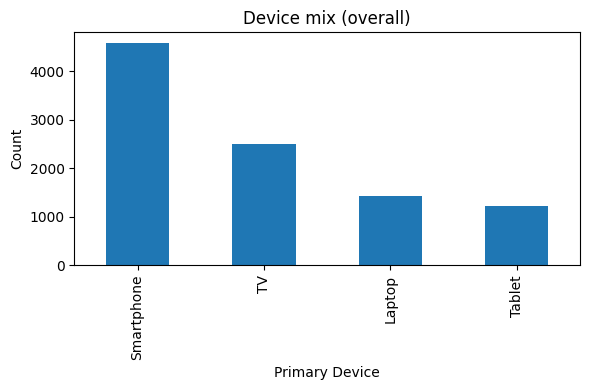

In [10]:
# Cell: Plot 1 - Device mix (overall)
plt.figure(figsize=(6,4))
if 'Primary_Device' in df.columns:
    counts = df['Primary_Device'].value_counts()
    counts.plot(kind='bar')
    plt.title('Device mix (overall)')
    plt.ylabel('Count')
    plt.xlabel('Primary Device')
    plt.tight_layout()
else:
    print('Primary_Device column not found')


<Figure size 800x400 with 0 Axes>

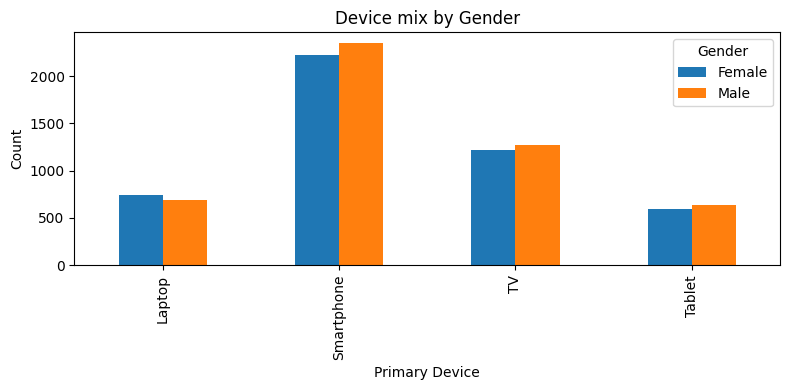

In [11]:
# Cell: Plot 2 - Device mix by Gender
plt.figure(figsize=(8,4))
if ('Primary_Device' in df.columns) and ('Gender' in df.columns):
    pivot = df.pivot_table(index='Primary_Device', columns='Gender', aggfunc='size', fill_value=0)
    pivot.plot(kind='bar', stacked=False, figsize=(8,4))
    plt.title('Device mix by Gender')
    plt.ylabel('Count')
    plt.xlabel('Primary Device')
    plt.tight_layout()
else:
    print('Required columns not found')


C:\Users\santh\AppData\Local\Temp\ipykernel_27612\405778011.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Age_Group', columns='Primary_Device', aggfunc='size', fill_value=0)


<Figure size 800x400 with 0 Axes>

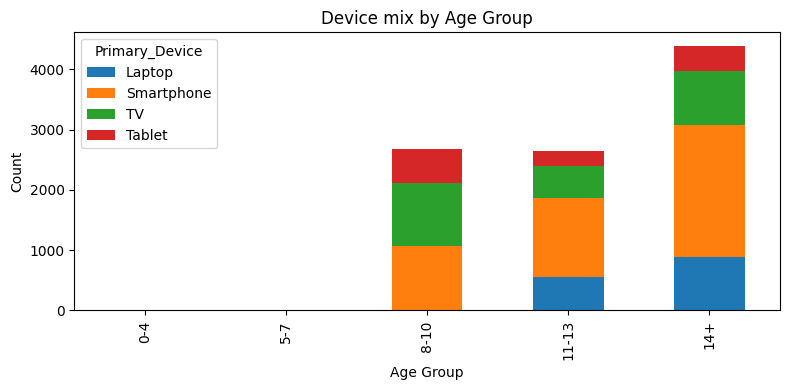

In [12]:
# Cell: Plot 3 - Device mix by Age Group
plt.figure(figsize=(8,4))
if ('Primary_Device' in df.columns) and ('Age_Group' in df.columns):
    pivot = df.pivot_table(index='Age_Group', columns='Primary_Device', aggfunc='size', fill_value=0)
    pivot.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title('Device mix by Age Group')
    plt.ylabel('Count')
    plt.xlabel('Age Group')
    plt.tight_layout()
else:
    print('Required columns not found')


<Figure size 800x400 with 0 Axes>

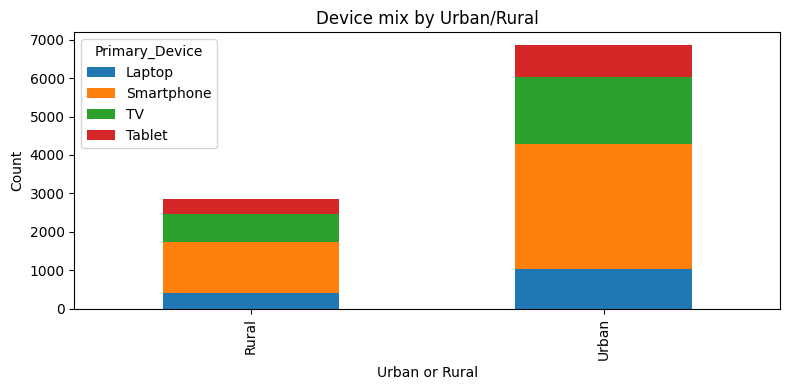

In [13]:
# Cell: Plot 4 - Device mix by Urban_or_Rural
plt.figure(figsize=(8,4))
if ('Primary_Device' in df.columns) and ('Urban_or_Rural' in df.columns):
    pivot = df.pivot_table(index='Urban_or_Rural', columns='Primary_Device', aggfunc='size', fill_value=0)
    pivot.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title('Device mix by Urban/Rural')
    plt.ylabel('Count')
    plt.xlabel('Urban or Rural')
    plt.tight_layout()
else:
    print('Required columns not found')


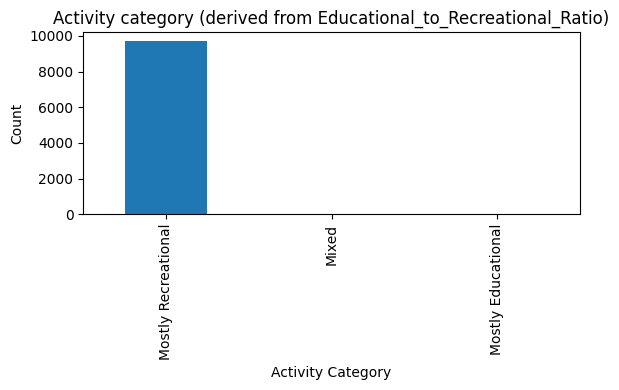

In [14]:
# Cell: Plot 5 - Activity category (overall)
plt.figure(figsize=(6,4))
if 'Activity_Category' in df.columns:
    counts = df['Activity_Category'].value_counts()
    counts.plot(kind='bar')
    plt.title('Activity category (derived from Educational_to_Recreational_Ratio)')
    plt.ylabel('Count')
    plt.xlabel('Activity Category')
    plt.tight_layout()
else:
    print('Activity_Category not available')


C:\Users\santh\AppData\Local\Temp\ipykernel_27612\872845342.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Activity_Category', columns='Gender', aggfunc='size', fill_value=0)


<Figure size 800x400 with 0 Axes>

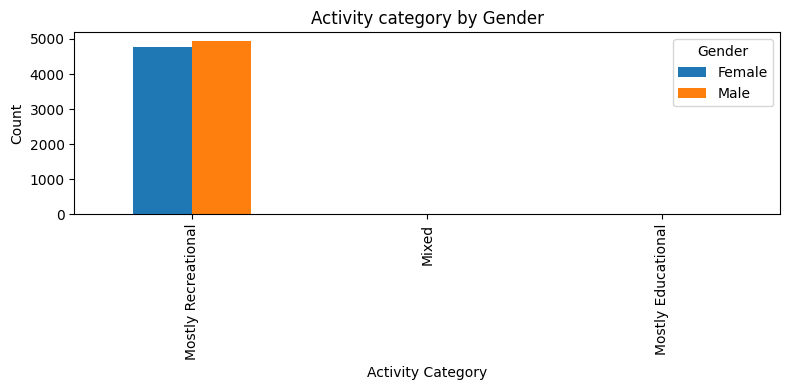

In [15]:
# Cell: Plot 6 - Activity category by Gender
plt.figure(figsize=(8,4))
if ('Activity_Category' in df.columns) and ('Gender' in df.columns):
    pivot = df.pivot_table(index='Activity_Category', columns='Gender', aggfunc='size', fill_value=0)
    pivot.plot(kind='bar', figsize=(8,4))
    plt.title('Activity category by Gender')
    plt.ylabel('Count')
    plt.xlabel('Activity Category')
    plt.tight_layout()
else:
    print('Required columns not found')


C:\Users\santh\AppData\Local\Temp\ipykernel_27612\1772333115.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean()


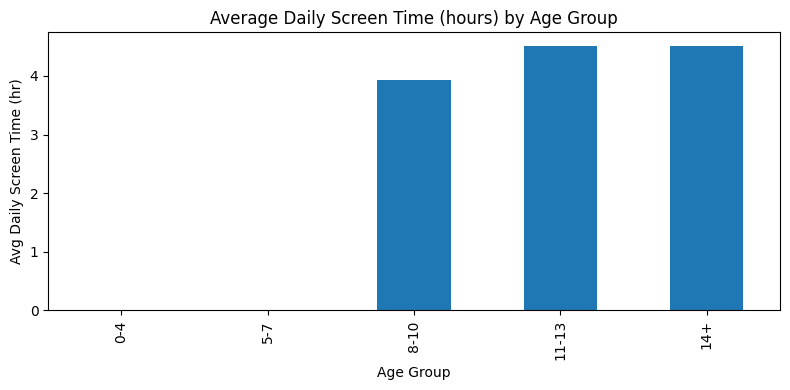

In [16]:
# Cell: Plot 7 - Avg Daily Screen Time by Age Group
plt.figure(figsize=(8,4))
if ('Avg_Daily_Screen_Time_hr' in df.columns) and ('Age_Group' in df.columns):
    agg = df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean()
    agg.plot(kind='bar')
    plt.title('Average Daily Screen Time (hours) by Age Group')
    plt.ylabel('Avg Daily Screen Time (hr)')
    plt.xlabel('Age Group')
    plt.tight_layout()
else:
    print('Required columns not found')


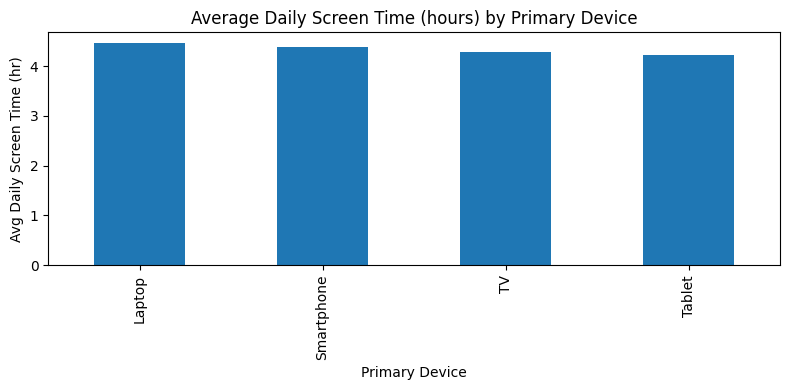

In [17]:
# Cell: Plot 8 - Avg Daily Screen Time by Primary Device
plt.figure(figsize=(8,4))
if ('Avg_Daily_Screen_Time_hr' in df.columns) and ('Primary_Device' in df.columns):
    agg = df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
    agg.plot(kind='bar')
    plt.title('Average Daily Screen Time (hours) by Primary Device')
    plt.ylabel('Avg Daily Screen Time (hr)')
    plt.xlabel('Primary Device')
    plt.tight_layout()
else:
    print('Required columns not found')


In [20]:
# Cell: Peak usage cohorts (summary)
if 'Avg_Daily_Screen_Time_hr' in df.columns:
    print('Top Age Groups by avg screen time:')
    if 'Age_Group' in df.columns:
        print(df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False))
    print('\nTop Devices by avg screen time:')
    if 'Primary_Device' in df.columns:
        print(df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False))
    print('\nTop by Gender:')
    if 'Gender' in df.columns:
        print(df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False))
else:
    print('Avg_Daily_Screen_Time_hr not found')


Top Age Groups by avg screen time:
Age_Group
11-13    4.517264
14+      4.514230
8-10     3.925049
0-4           NaN
5-7           NaN
Name: Avg_Daily_Screen_Time_hr, dtype: float64

Top Devices by avg screen time:
Primary_Device
Laptop        4.459086
Smartphone    4.388925
TV            4.287752
Tablet        4.226005
Name: Avg_Daily_Screen_Time_hr, dtype: float64

Top by Gender:
Gender
Male      4.377754
Female    4.327021
Name: Avg_Daily_Screen_Time_hr, dtype: float64


C:\Users\santh\AppData\Local\Temp\ipykernel_27612\528305104.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False))


# Insights

1. I analyzed individual variables using bar charts and histograms to understand the distribution of screen time, device types, and age groups.
2. Bivariate analysis showed that older children and those without parental control spent more time on screens.
3. I used Matplotlib and Seaborn for visualizations like bar, pie, and box plots to highlight usage trends.
4. The average screen time was around 3–5 hours daily, higher among urban kids and those with personal devices.
5. Correlation analysis revealed a positive link between device ownership and screen time, and a negative link with parental control.
6. Charts showed entertainment and gaming as the main reasons for screen use, with education being less common.
7. Teenagers had the highest usage, while younger kids mainly watched cartoons and videos.